# Exploración del Dataset: ITAEE y Tipos de Cambio

Análisis exploratorio del dataset unificado con series trimestrales del ITAEE
(Nacional y 5 estados) y 11 tipos de cambio vs MXN.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["savefig.bbox"] = "tight"

FIG_DIR = os.path.join(os.path.dirname(os.getcwd()), "figures")
os.makedirs(FIG_DIR, exist_ok=True)

df = pd.read_csv(
    os.path.join(os.path.dirname(os.getcwd()), "data", "dataset.csv"),
    index_col=0,
    parse_dates=False,
)
# Convert PeriodIndex string to datetime (start of quarter) for plotting
df.index = pd.PeriodIndex(df.index, freq="Q").to_timestamp()
df.index.name = "date"

itaee_cols = [c for c in df.columns if c.startswith("ITAEE_")]
fx_cols = [c for c in df.columns if c.startswith("FX_")]

print(f"Dataset: {df.shape[0]} trimestres x {df.shape[1]} variables")
print(f"Periodo: {df.index[0]} a {df.index[-1]}")
print("ITAEE series:", itaee_cols)
print("FX series:", fx_cols)
df.describe().round(2)

Dataset: 70 trimestres x 17 variables
Periodo: 2007-04-01 00:00:00 a 2024-10-01 00:00:00
ITAEE series: ['ITAEE_Nacional', 'ITAEE_Aguascalientes', 'ITAEE_Durango', 'ITAEE_Querétaro', 'ITAEE_San Luis Potosí', 'ITAEE_Zacatecas']
FX series: ['FX_USD', 'FX_CAD', 'FX_BRL', 'FX_JPY', 'FX_CNY', 'FX_COP', 'FX_CLP', 'FX_RUB', 'FX_ILS', 'FX_EUR', 'FX_INR']


,ITAEE_Nacional,ITAEE_Aguascalientes,ITAEE_Durango,ITAEE_Querétaro,ITAEE_San Luis Potosí,ITAEE_Zacatecas,FX_USD,FX_CAD,FX_BRL,FX_JPY,FX_CNY,FX_COP,FX_CLP,FX_RUB,FX_ILS,FX_EUR,FX_INR
count,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00,70.00
mean,93.18,85.60,94.59,89.53,86.50,92.11,16.24,13.40,5.36,0.15,2.43,0.01,0.03,0.34,4.50,19.47,0.26
std,7.82,14.34,7.58,10.18,12.05,10.18,3.49,1.68,1.27,0.03,0.51,0.01,0.01,0.09,1.12,2.74,0.03
min,76.04,57.13,77.73,67.05,65.38,68.96,10.32,9.90,3.31,0.09,1.42,0.00,0.02,0.18,2.66,14.65,0.20
25%,86.80,72.65,88.01,83.31,76.04,86.13,13.00,12.22,4.17,0.13,2.04,0.01,0.02,0.29,3.45,17.14,0.24
50%,94.96,91.14,96.10,93.08,88.94,92.58,17.02,13.09,5.58,0.15,2.46,0.01,0.03,0.32,4.58,18.82,0.27
75%,99.53,97.70,100.56,97.28,96.16,100.62,19.35,14.68,6.26,0.17,2.84,0.01,0.03,0.42,5.42,21.46,0.28
max,106.17,103.69,107.62,103.51,105.44,112.80,23.34,16.83,7.56,0.22,3.29,0.07,0.09,0.61,6.64,25.81,0.31


## 1. Series ITAEE: Nacional y estados seleccionados

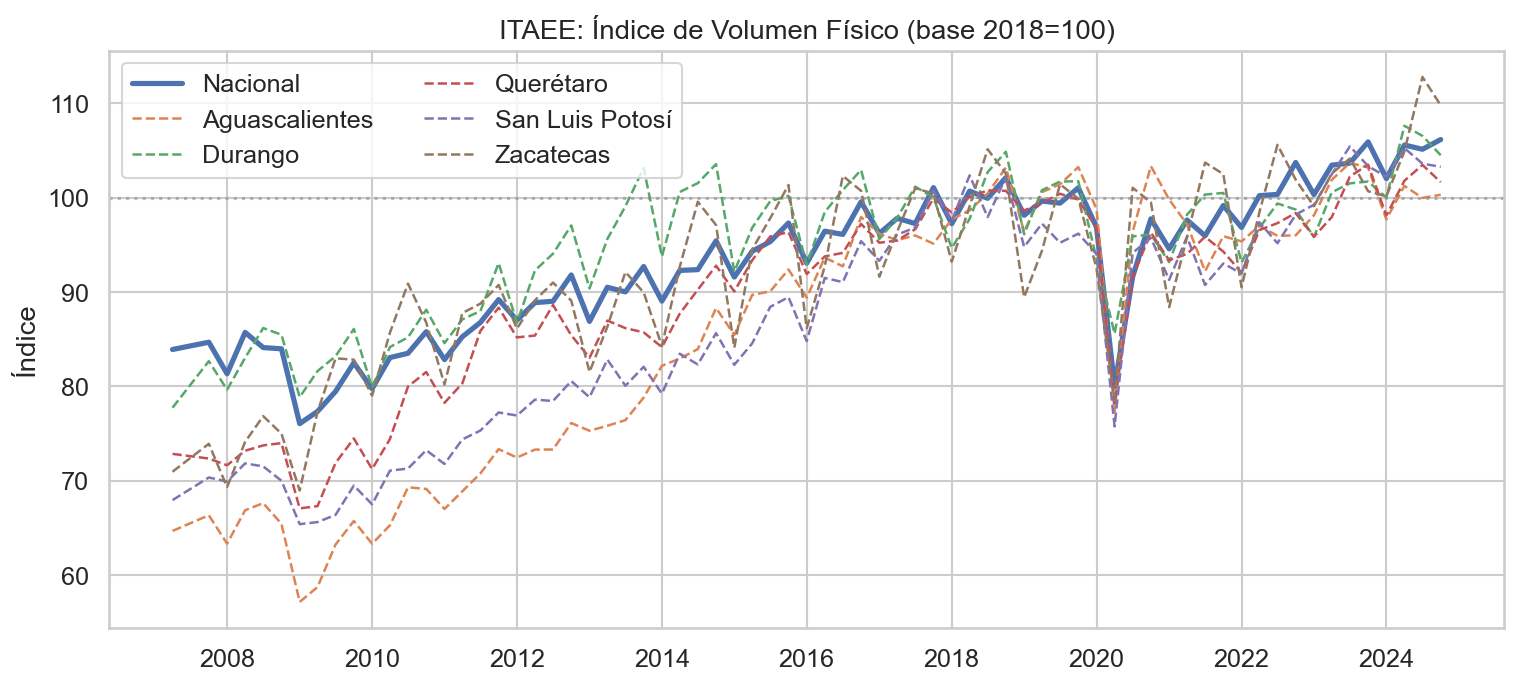

In [2]:
fig, ax = plt.subplots(figsize=(12, 5))
for col in itaee_cols:
    label = col.replace("ITAEE_", "")
    lw = 2.5 if label == "Nacional" else 1.2
    ls = "-" if label == "Nacional" else "--"
    ax.plot(df.index, df[col], label=label, linewidth=lw, linestyle=ls)
ax.set_title("ITAEE: Índice de Volumen Físico (base 2018=100)")
ax.set_ylabel("Índice")
ax.legend(loc="upper left", frameon=True, ncol=2)
ax.axhline(100, color="gray", linestyle=":", alpha=0.5)
fig.savefig(os.path.join(FIG_DIR, "01_itaee_series.png"))
plt.show()

## 2. Tipos de cambio vs MXN

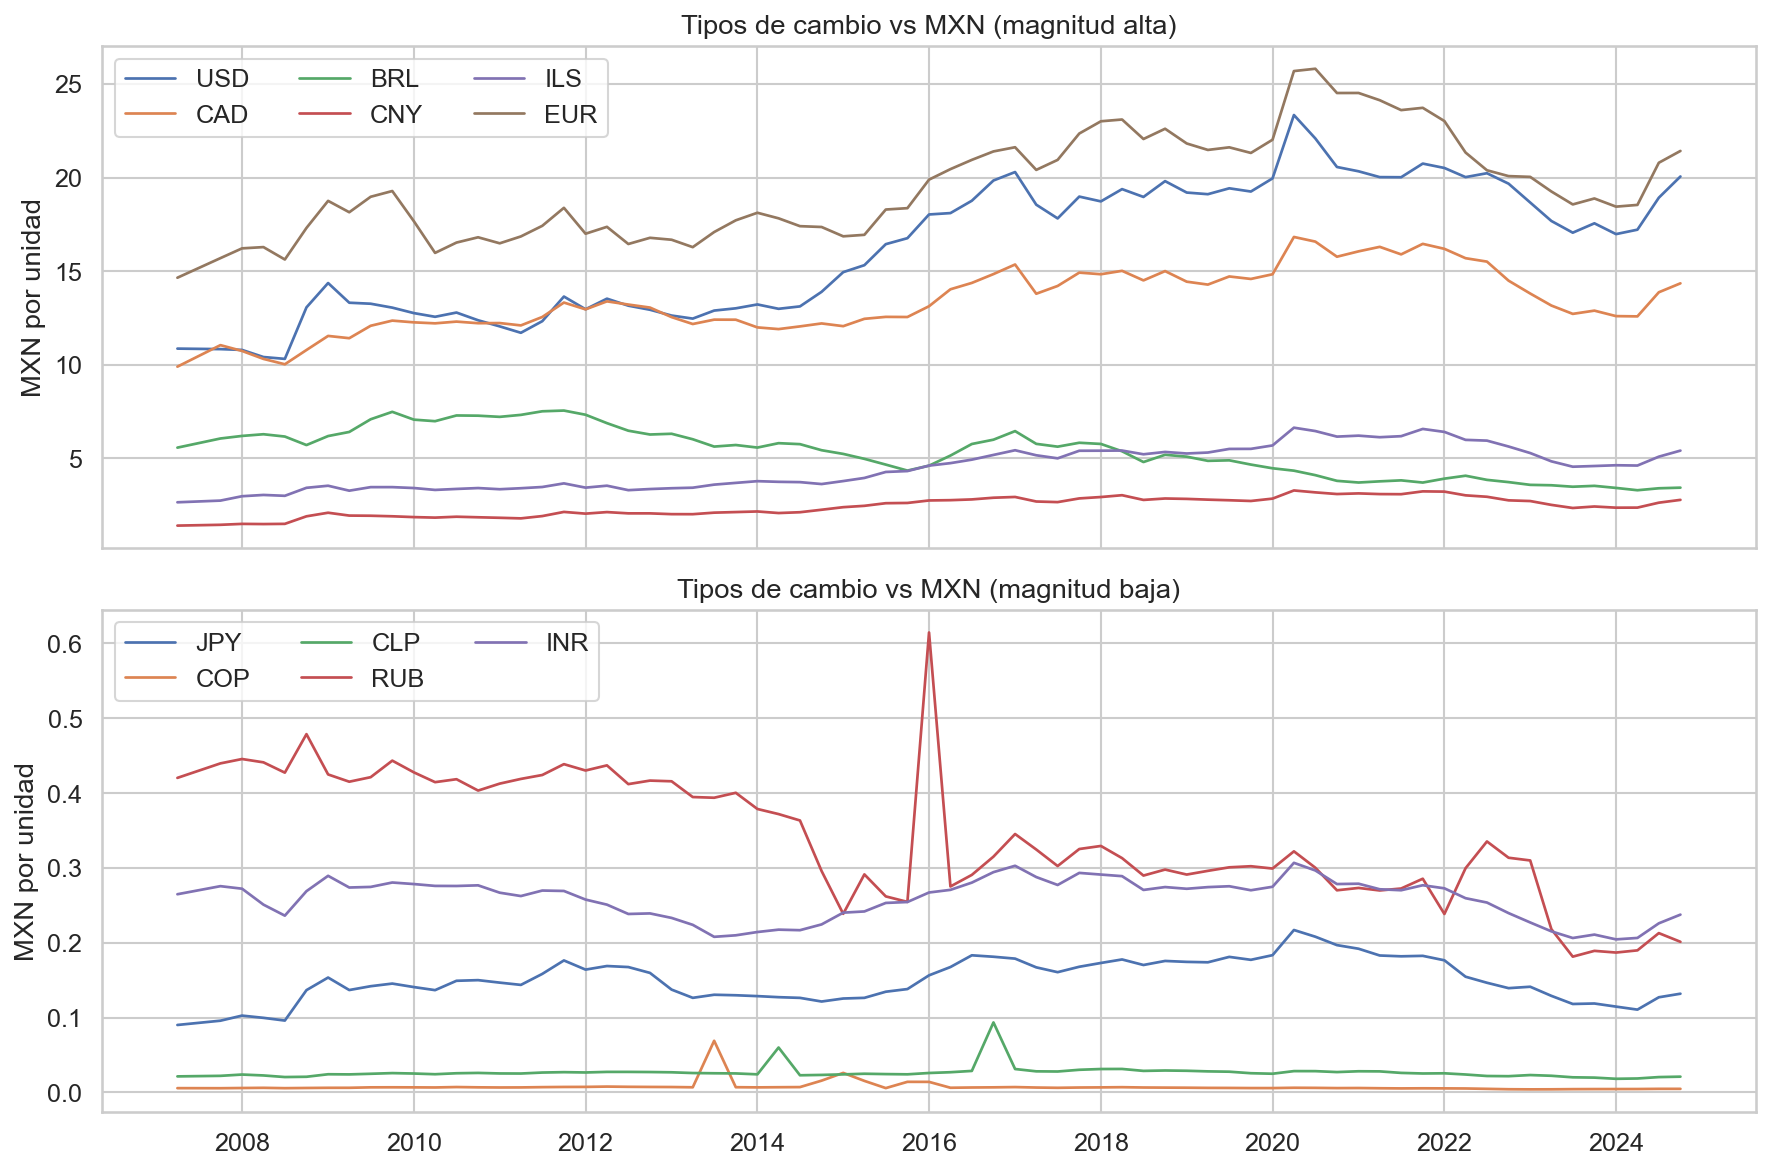

In [3]:
# Split FX into two groups by magnitude for readability
fx_high = [c for c in fx_cols if df[c].mean() > 1]  # USD, CAD, EUR, BRL, ILS, etc.
fx_low = [c for c in fx_cols if df[c].mean() <= 1]   # JPY, CNY, COP, CLP, INR, RUB

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

for col in fx_high:
    axes[0].plot(df.index, df[col], label=col.replace("FX_", ""), linewidth=1.3)
axes[0].set_title("Tipos de cambio vs MXN (magnitud alta)")
axes[0].set_ylabel("MXN por unidad")
axes[0].legend(loc="upper left", frameon=True, ncol=3)

for col in fx_low:
    axes[1].plot(df.index, df[col], label=col.replace("FX_", ""), linewidth=1.3)
axes[1].set_title("Tipos de cambio vs MXN (magnitud baja)")
axes[1].set_ylabel("MXN por unidad")
axes[1].legend(loc="upper left", frameon=True, ncol=3)

plt.tight_layout()
fig.savefig(os.path.join(FIG_DIR, "02_fx_series.png"))
plt.show()

## 3. Tipos de cambio normalizados (base 100 = inicio del periodo)

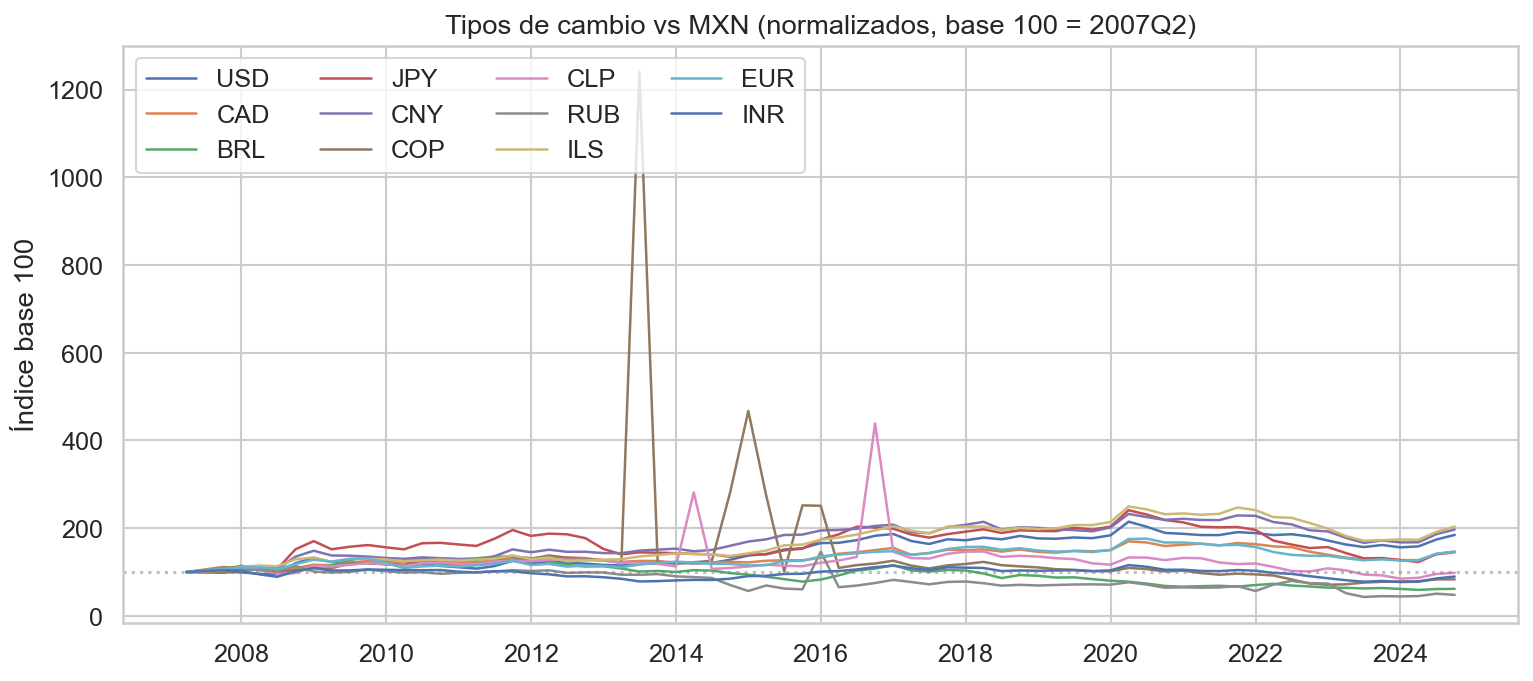

In [4]:
fx_norm = df[fx_cols].div(df[fx_cols].iloc[0]) * 100

fig, ax = plt.subplots(figsize=(12, 5))
for col in fx_norm.columns:
    ax.plot(df.index, fx_norm[col], label=col.replace("FX_", ""), linewidth=1.2)
ax.axhline(100, color="gray", linestyle=":", alpha=0.5)
ax.set_title("Tipos de cambio vs MXN (normalizados, base 100 = 2007Q2)")
ax.set_ylabel("Índice base 100")
ax.legend(loc="upper left", frameon=True, ncol=4)
fig.savefig(os.path.join(FIG_DIR, "03_fx_normalized.png"))
plt.show()

## 4. Estadísticas descriptivas

In [5]:
print("=== ITAEE ===")
display(df[itaee_cols].describe().round(2))
print()
print("=== Tipos de Cambio ===")
display(df[fx_cols].describe().round(4))

=== ITAEE ===


,ITAEE_Nacional,ITAEE_Aguascalientes,ITAEE_Durango,ITAEE_Querétaro,ITAEE_San Luis Potosí,ITAEE_Zacatecas
count,70.00,70.00,70.00,70.00,70.00,70.00
mean,93.18,85.60,94.59,89.53,86.50,92.11
std,7.82,14.34,7.58,10.18,12.05,10.18
min,76.04,57.13,77.73,67.05,65.38,68.96
25%,86.80,72.65,88.01,83.31,76.04,86.13
50%,94.96,91.14,96.10,93.08,88.94,92.58
75%,99.53,97.70,100.56,97.28,96.16,100.62
max,106.17,103.69,107.62,103.51,105.44,112.80



=== Tipos de Cambio ===


,FX_USD,FX_CAD,FX_BRL,FX_JPY,FX_CNY,FX_COP,FX_CLP,FX_RUB,FX_ILS,FX_EUR,FX_INR
count,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000,70.0000
mean,16.2380,13.4014,5.3603,0.1504,2.4327,0.0077,0.0266,0.3408,4.4997,19.4743,0.2584
std,3.4925,1.6782,1.2722,0.0281,0.5065,0.0081,0.0096,0.0853,1.1153,2.7369,0.0270
min,10.3183,9.9022,3.3053,0.0900,1.4171,0.0039,0.0181,0.1814,2.6622,14.6503,0.2045
25%,12.9970,12.2241,4.1706,0.1291,2.0357,0.0056,0.0238,0.2900,3.4508,17.1436,0.2386
50%,17.0167,13.0926,5.5815,0.1479,2.4555,0.0062,0.0254,0.3234,4.5801,18.8168,0.2694
75%,19.3475,14.6844,6.2615,0.1742,2.8365,0.0068,0.0275,0.4165,5.4156,21.4586,0.2759
max,23.3354,16.8263,7.5585,0.2170,3.2937,0.0689,0.0934,0.6147,6.6446,25.8062,0.3068


## 5. Variaciones porcentuales trimestrales

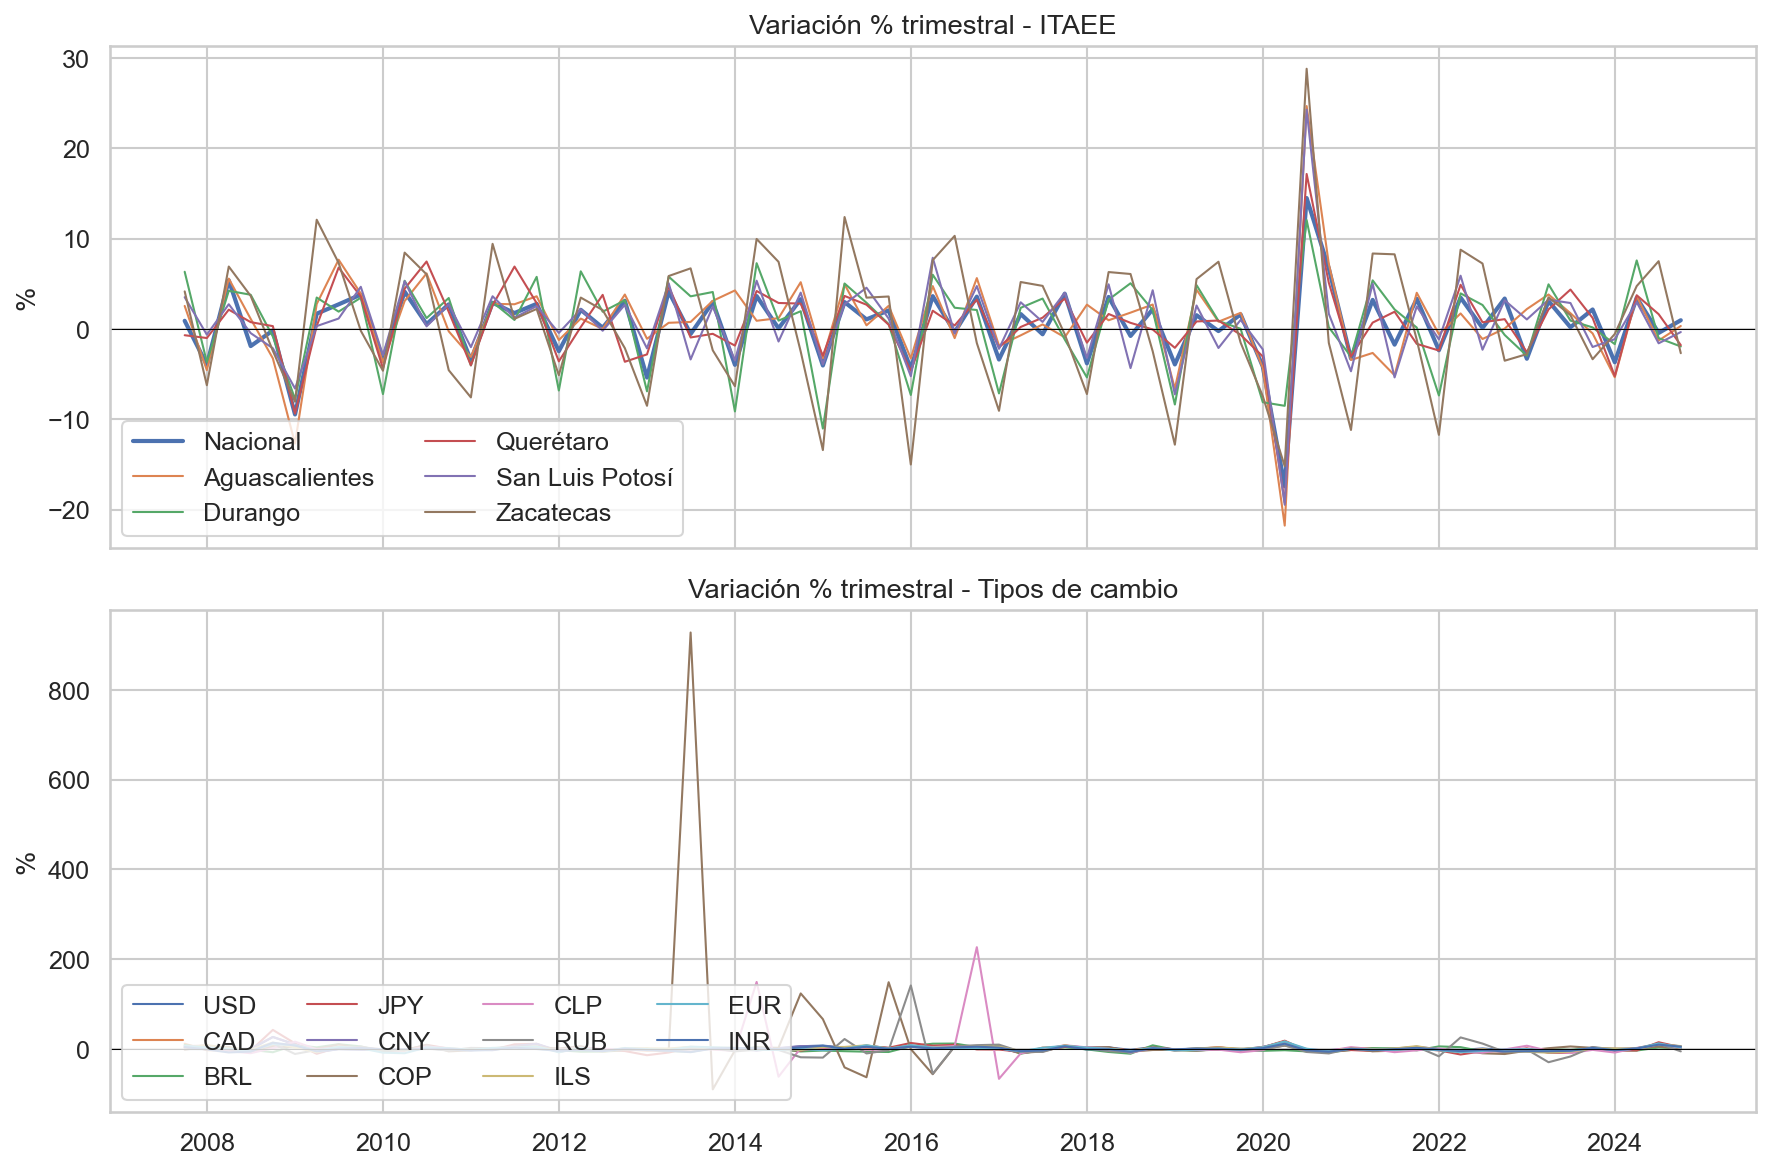

In [6]:
pct = df.pct_change().dropna() * 100

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

for col in itaee_cols:
    label = col.replace("ITAEE_", "")
    lw = 2.0 if label == "Nacional" else 1.0
    axes[0].plot(pct.index, pct[col], label=label, linewidth=lw)
axes[0].axhline(0, color="black", linewidth=0.5)
axes[0].set_title("Variación % trimestral - ITAEE")
axes[0].set_ylabel("%")
axes[0].legend(loc="lower left", frameon=True, ncol=2)

for col in fx_cols:
    axes[1].plot(pct.index, pct[col], label=col.replace("FX_", ""), linewidth=1.0)
axes[1].axhline(0, color="black", linewidth=0.5)
axes[1].set_title("Variación % trimestral - Tipos de cambio")
axes[1].set_ylabel("%")
axes[1].legend(loc="lower left", frameon=True, ncol=4)

plt.tight_layout()
fig.savefig(os.path.join(FIG_DIR, "04_pct_change.png"))
plt.show()

## 6. Matriz de correlación

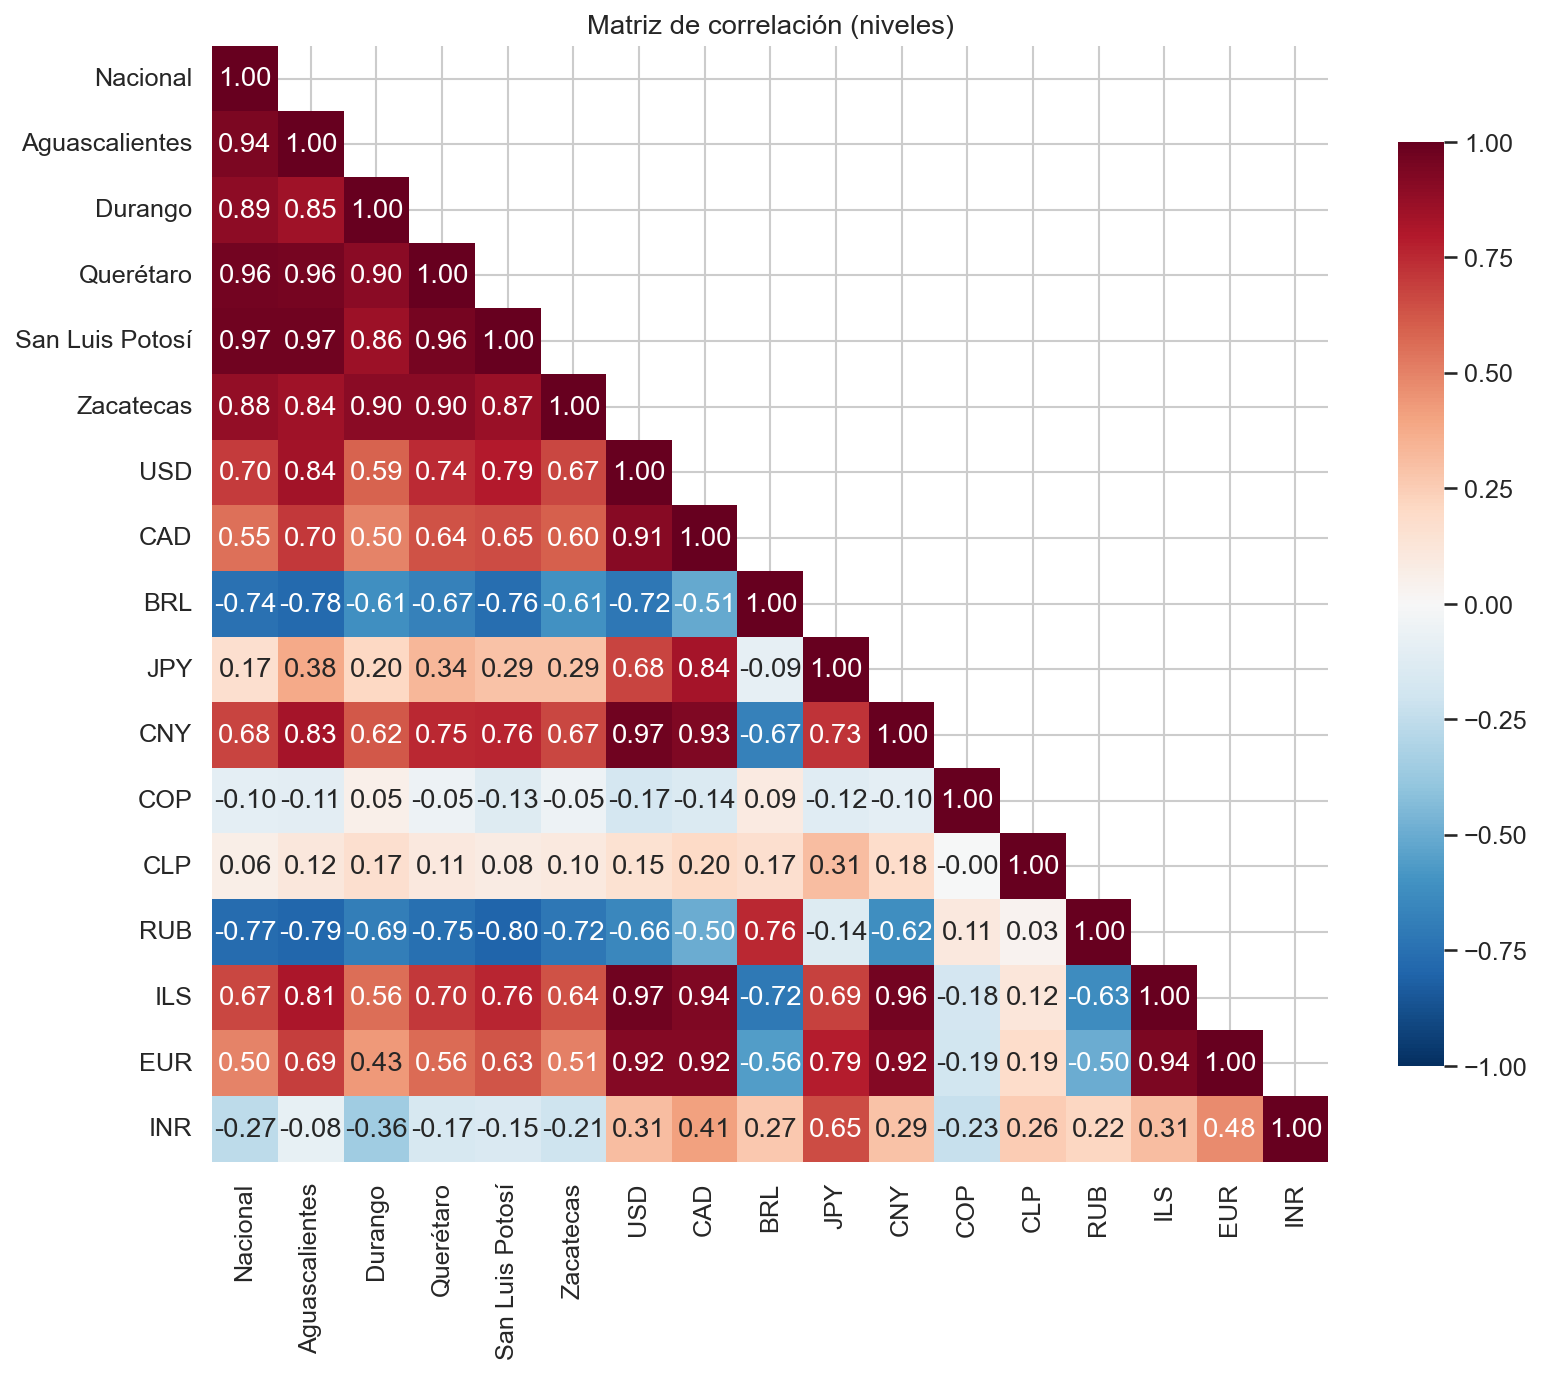

In [7]:
corr = df.corr()
# Clean labels
labels = [c.replace("ITAEE_", "").replace("FX_", "") for c in corr.columns]

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(
    corr, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r",
    center=0, vmin=-1, vmax=1, square=True,
    xticklabels=labels, yticklabels=labels, ax=ax,
    cbar_kws={"shrink": 0.8}
)
ax.set_title("Matriz de correlación (niveles)")
fig.savefig(os.path.join(FIG_DIR, "05_correlation_levels.png"))
plt.show()

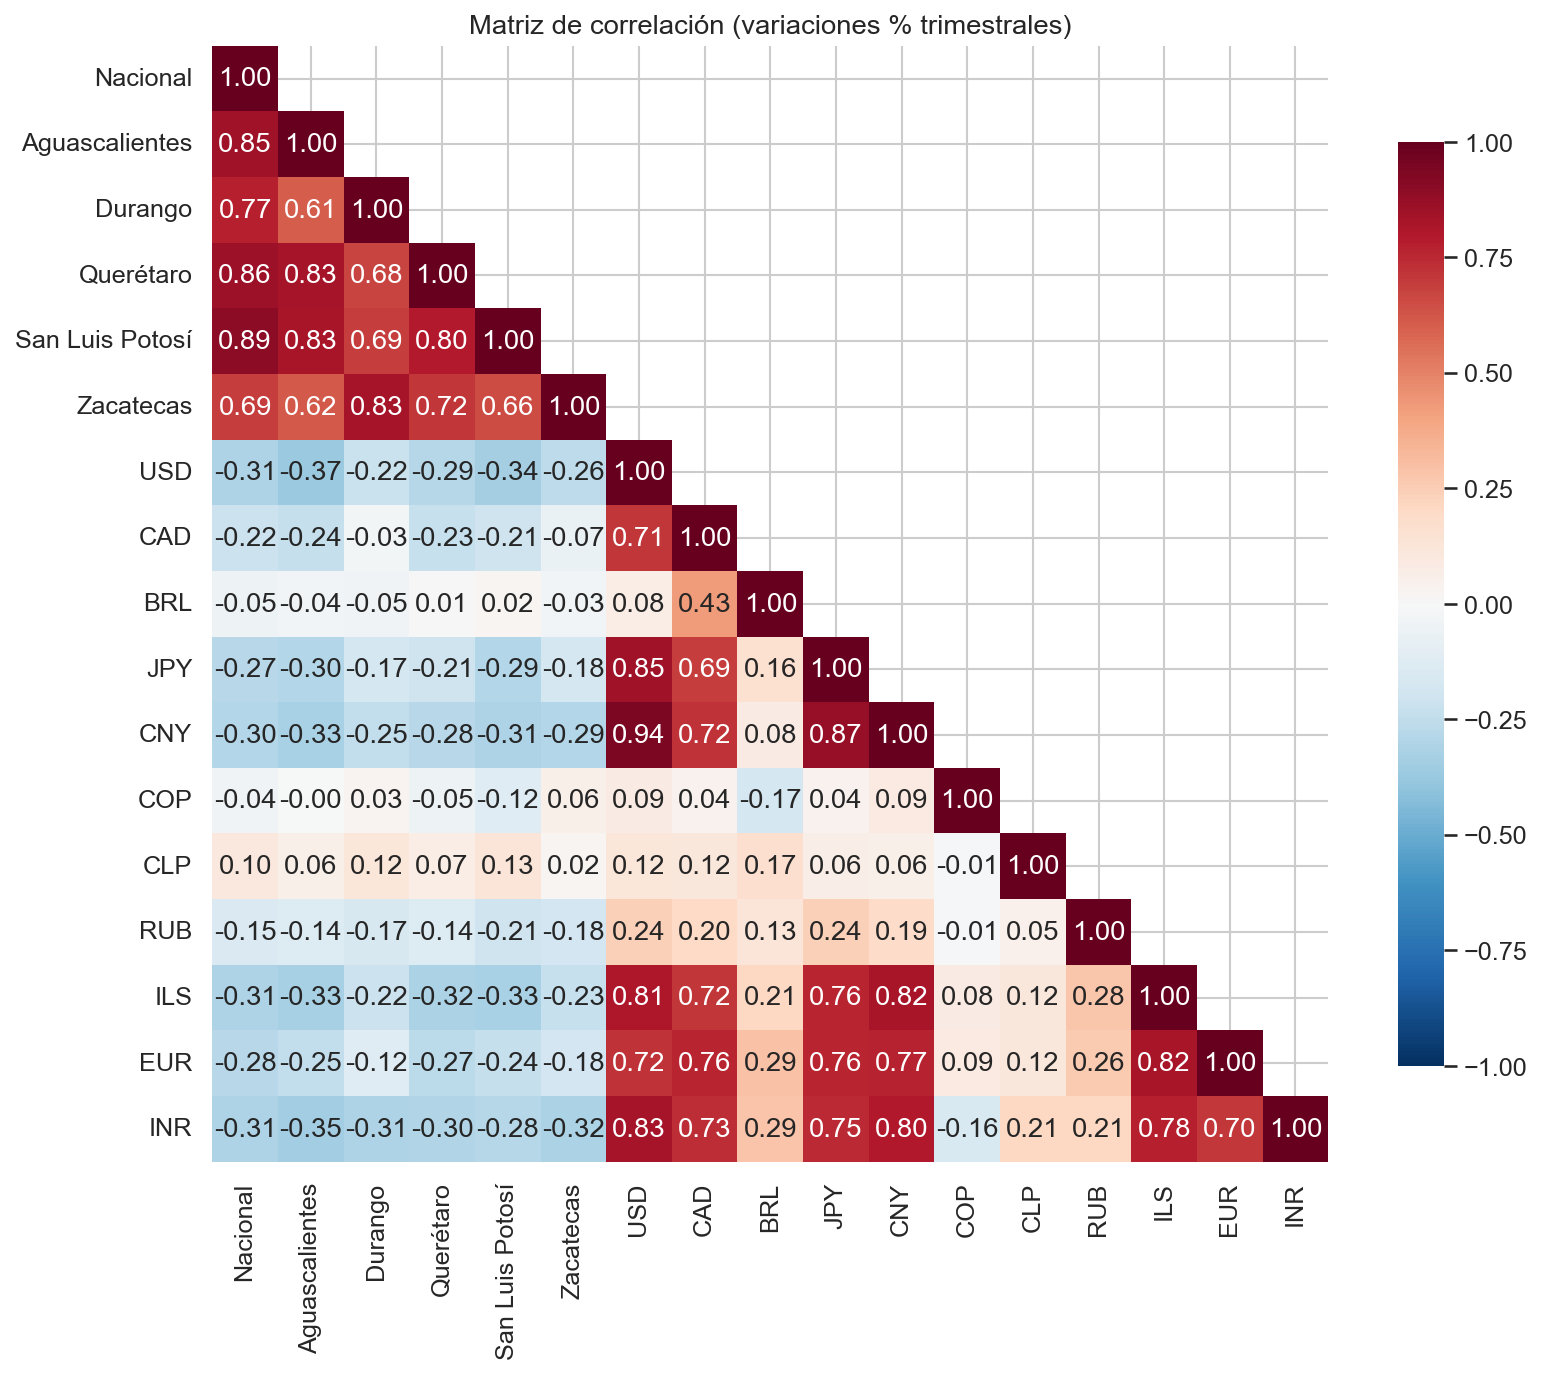

In [8]:
# Correlation of quarter-over-quarter changes
corr_pct = pct.corr()
labels_pct = [c.replace("ITAEE_", "").replace("FX_", "") for c in corr_pct.columns]

fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_pct, dtype=bool), k=1)
sns.heatmap(
    corr_pct, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r",
    center=0, vmin=-1, vmax=1, square=True,
    xticklabels=labels_pct, yticklabels=labels_pct, ax=ax,
    cbar_kws={"shrink": 0.8}
)
ax.set_title("Matriz de correlación (variaciones % trimestrales)")
fig.savefig(os.path.join(FIG_DIR, "06_correlation_pctchange.png"))
plt.show()

## 7. ITAEE por estado vs USDMXN (eje dual)

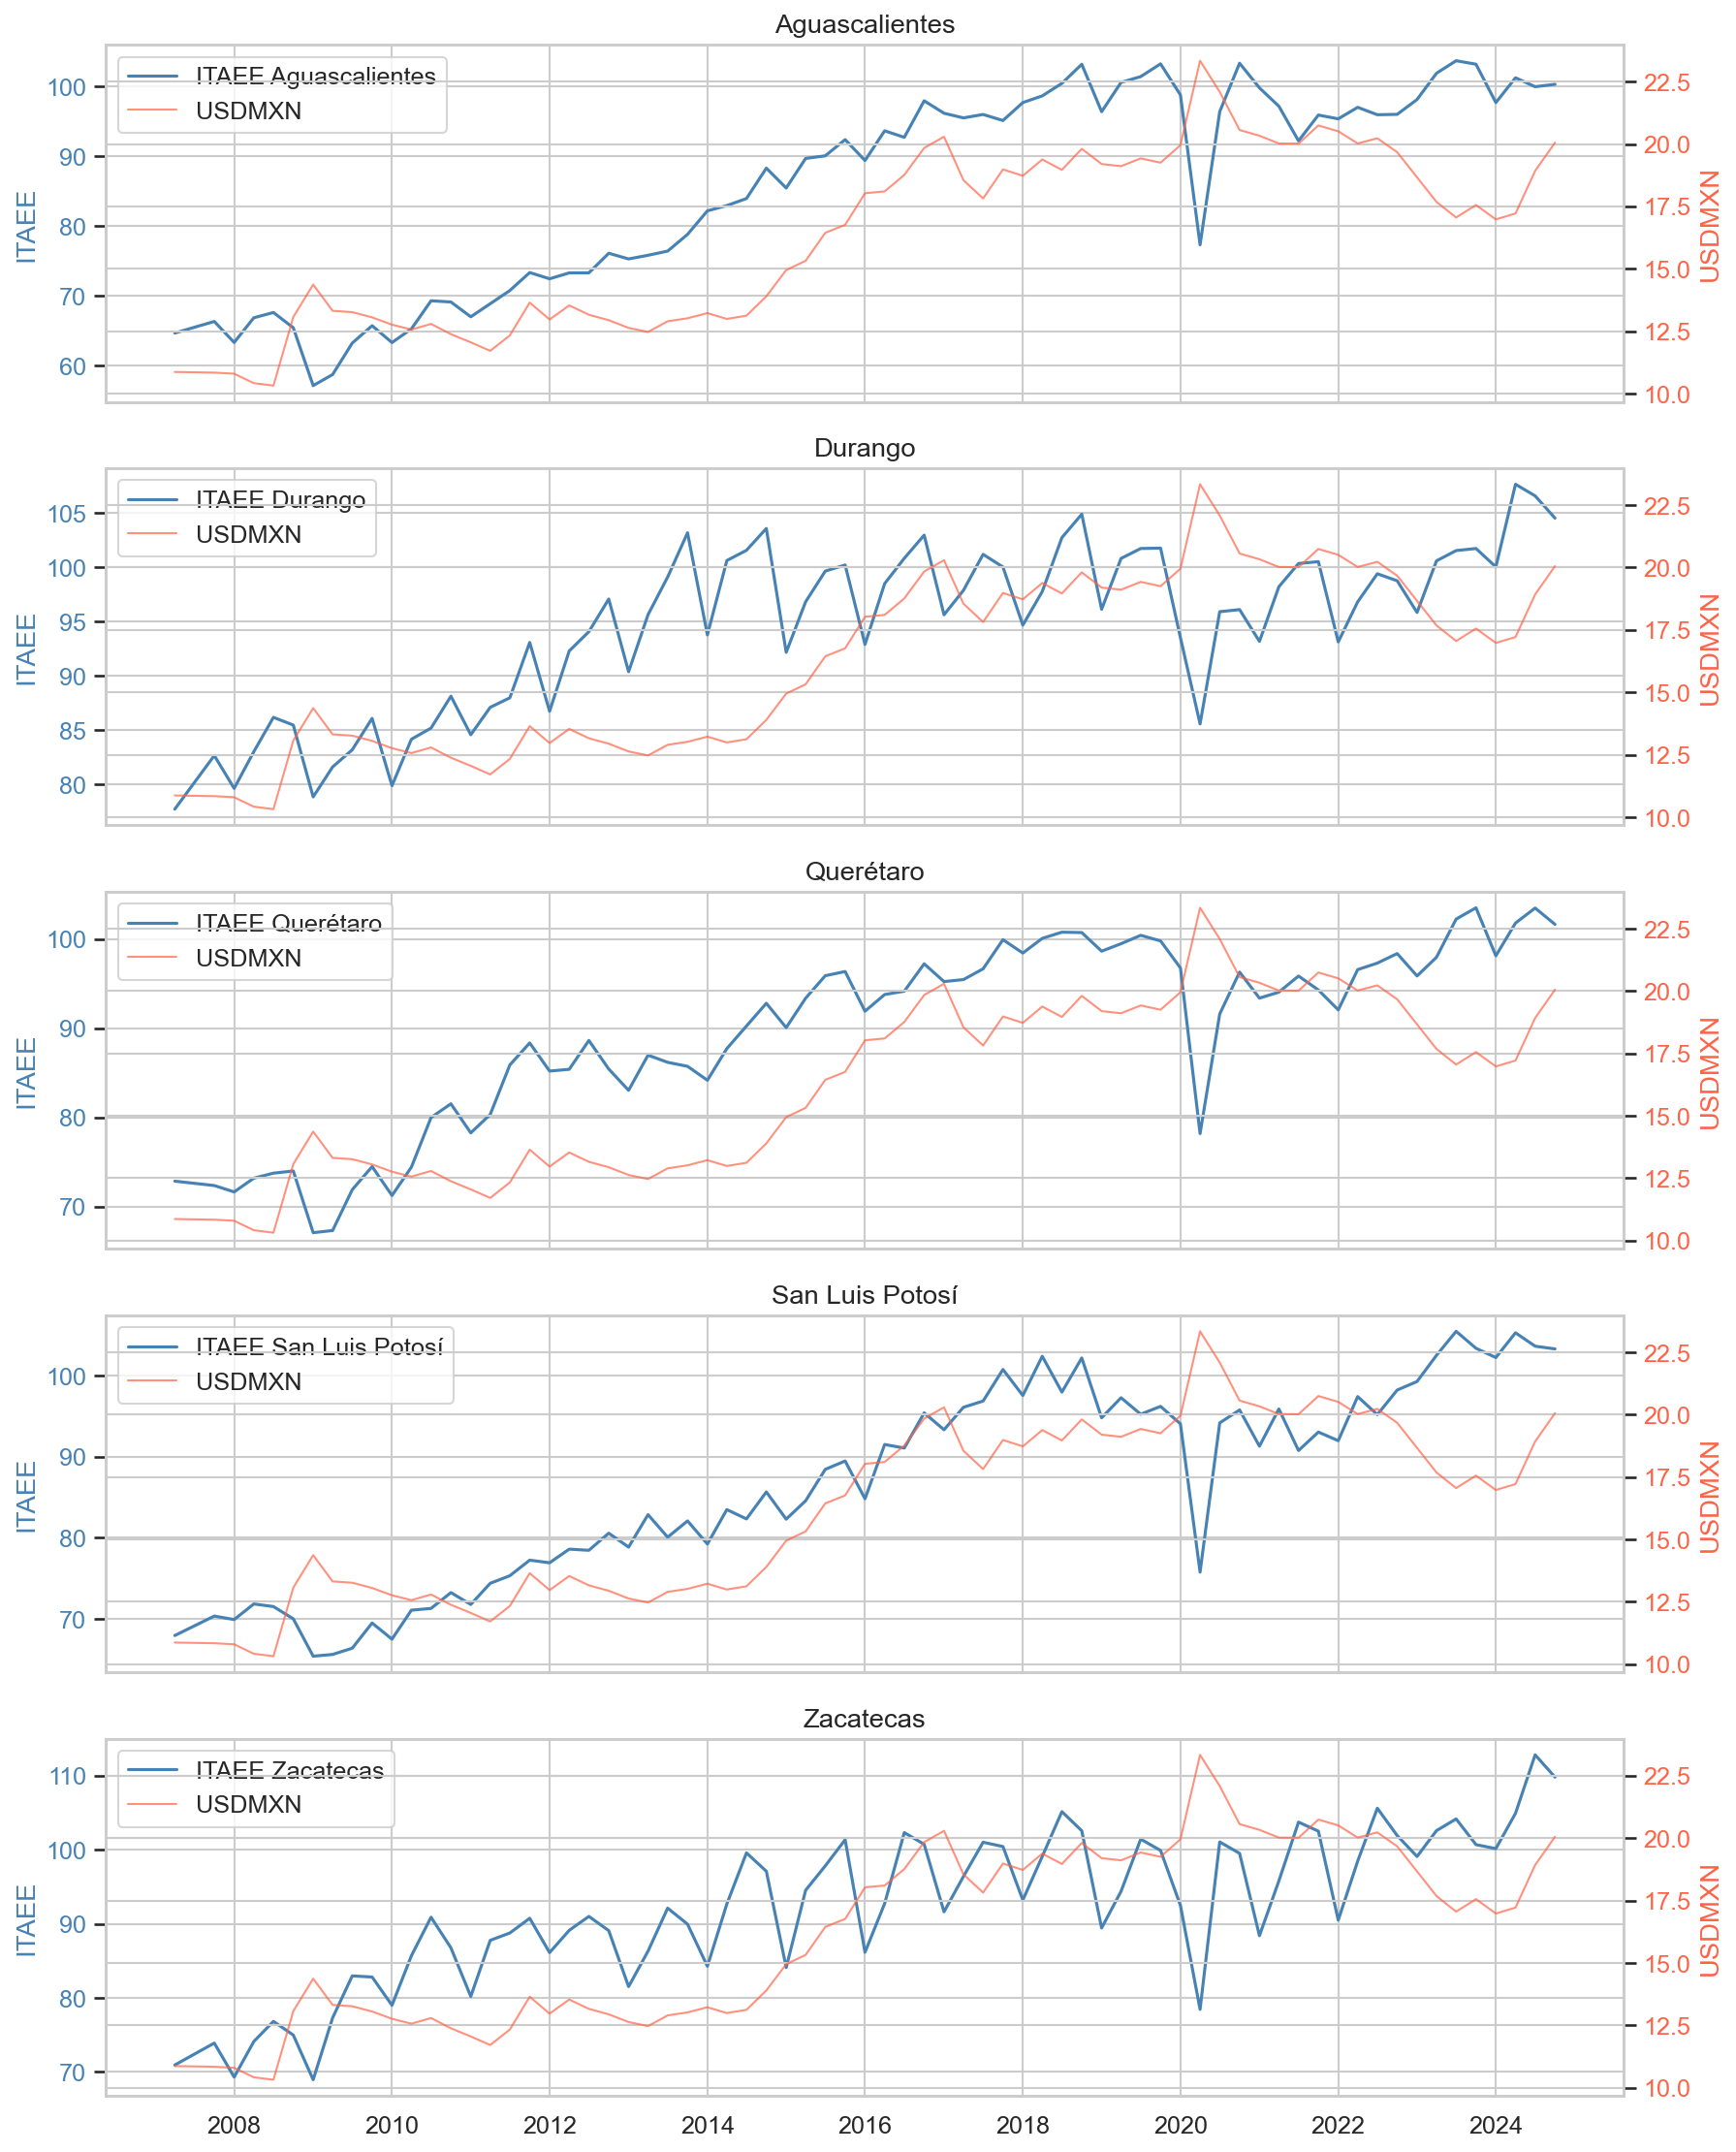

In [9]:
state_itaee = [c for c in itaee_cols if c != "ITAEE_Nacional"]

fig, axes = plt.subplots(len(state_itaee), 1, figsize=(12, 3 * len(state_itaee)), sharex=True)

for ax, col in zip(axes, state_itaee):
    label = col.replace("ITAEE_", "")
    ax.plot(df.index, df[col], color="steelblue", linewidth=1.5, label=f"ITAEE {label}")
    ax.set_ylabel("ITAEE", color="steelblue")
    ax.tick_params(axis="y", labelcolor="steelblue")
    
    ax2 = ax.twinx()
    ax2.plot(df.index, df["FX_USD"], color="tomato", linewidth=1.0, alpha=0.7, label="USDMXN")
    ax2.set_ylabel("USDMXN", color="tomato")
    ax2.tick_params(axis="y", labelcolor="tomato")
    
    ax.set_title(label)
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc="upper left", frameon=True)

plt.tight_layout()
fig.savefig(os.path.join(FIG_DIR, "07_itaee_vs_usdmxn.png"))
plt.show()

## 8. Distribuciones (variaciones %)

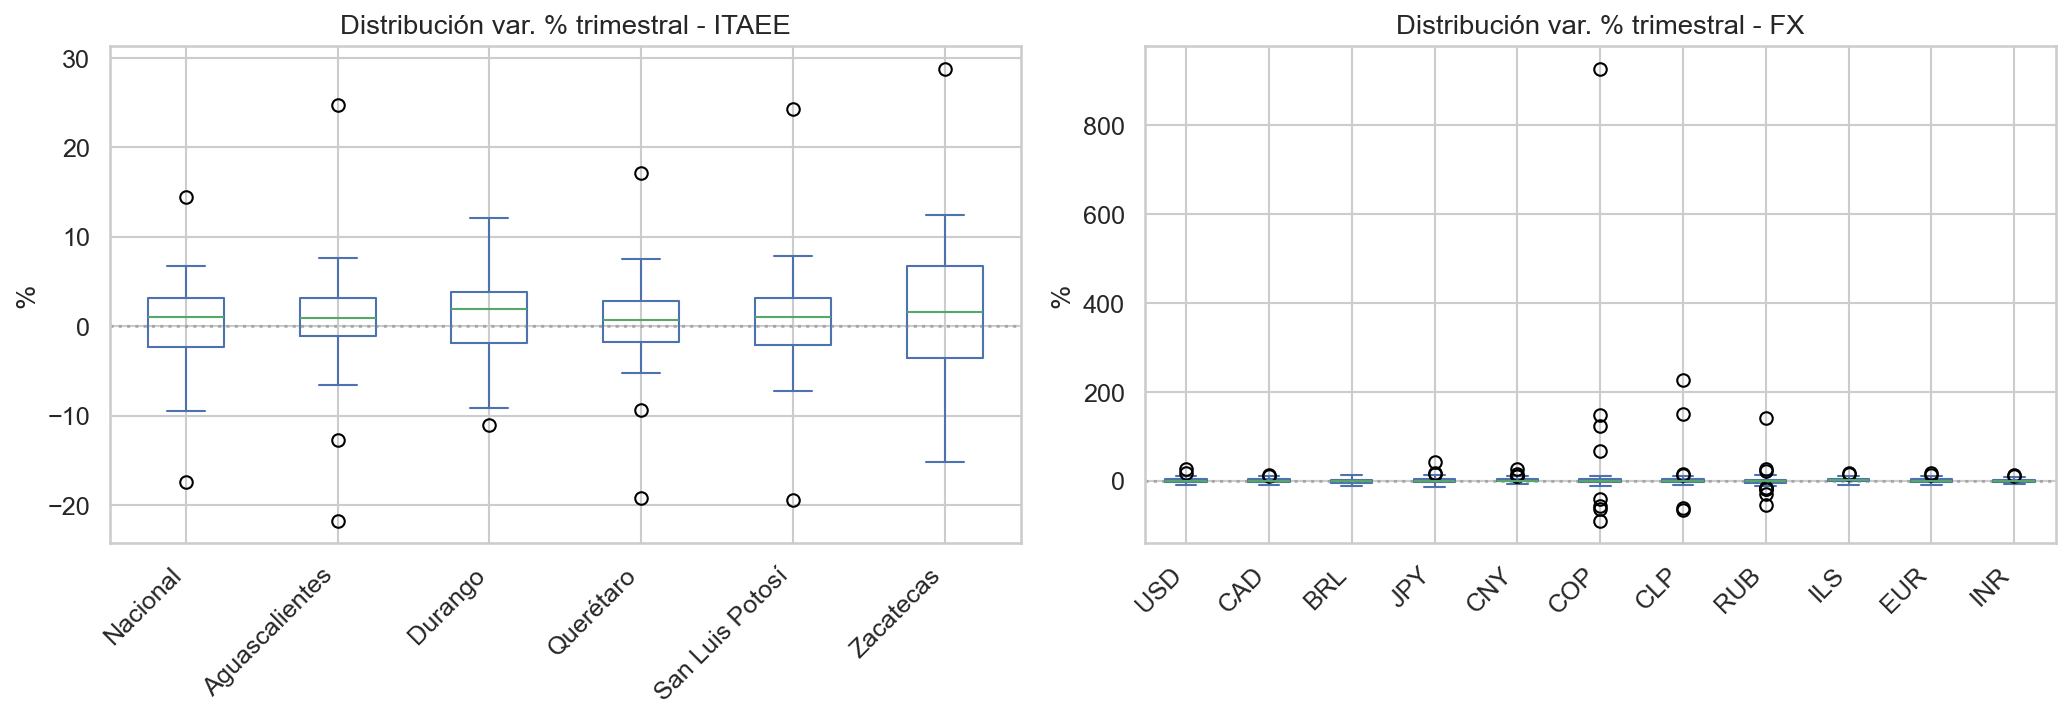

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

pct[itaee_cols].plot.box(ax=axes[0], vert=True)
axes[0].set_title("Distribución var. % trimestral - ITAEE")
axes[0].set_xticklabels([c.replace("ITAEE_", "") for c in itaee_cols], rotation=45, ha="right")
axes[0].set_ylabel("%")
axes[0].axhline(0, color="gray", linestyle=":", alpha=0.5)

pct[fx_cols].plot.box(ax=axes[1], vert=True)
axes[1].set_title("Distribución var. % trimestral - FX")
axes[1].set_xticklabels([c.replace("FX_", "") for c in fx_cols], rotation=45, ha="right")
axes[1].set_ylabel("%")
axes[1].axhline(0, color="gray", linestyle=":", alpha=0.5)

plt.tight_layout()
fig.savefig(os.path.join(FIG_DIR, "08_boxplots.png"))
plt.show()

## Resumen

Figuras guardadas en :
1.  - Series ITAEE en niveles
2.  - Tipos de cambio en niveles
3.  - FX normalizados base 100
4.  - Variaciones % trimestrales
5.  - Correlación en niveles
6.  - Correlación en cambios %
7.  - ITAEE por estado vs USDMXN
8.  - Boxplots de variaciones %